### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
institution_data = pd.read_csv('data_cleaned.csv')

In [3]:
institution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1187 non-null   int64  
 1   Institution_ID                   1187 non-null   int64  
 2   institution_name                 1187 non-null   object 
 3   city                             1187 non-null   object 
 4   state_or_territory_abbreviation  1187 non-null   object 
 5   predominant_degree_awarded       1187 non-null   object 
 6   territory_or_state_area_sqmi     1187 non-null   float64
 7   territory_or_state_population    1187 non-null   float64
 8   admission_rate                   1187 non-null   float64
 9   act_25th_percentile_score        1187 non-null   float64
 10  graduation_rate                  1187 non-null   float64
 11  graduation_frequency             1187 non-null   float64
dtypes: float64(6), int64

### The institution_ID series is an assigned value to each institution and should be an object datatype.

In [4]:
institution_data['Institution_ID'] = institution_data['Institution_ID'].astype('object')
institution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1187 non-null   int64  
 1   Institution_ID                   1187 non-null   object 
 2   institution_name                 1187 non-null   object 
 3   city                             1187 non-null   object 
 4   state_or_territory_abbreviation  1187 non-null   object 
 5   predominant_degree_awarded       1187 non-null   object 
 6   territory_or_state_area_sqmi     1187 non-null   float64
 7   territory_or_state_population    1187 non-null   float64
 8   admission_rate                   1187 non-null   float64
 9   act_25th_percentile_score        1187 non-null   float64
 10  graduation_rate                  1187 non-null   float64
 11  graduation_frequency             1187 non-null   float64
dtypes: float64(6), int64

In [5]:
institution_data.head()

,Unnamed: 0,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
0,0,100654,Alabama A & M University,Normal,AL,Bachelor's Degree,-0.329042,-0.654946,-0.007511,-1.249341,-1.796206,-0.207178
1,1,100663,University of Alabama at Birmingham,Birmingham,AL,Bachelor's Degree,-0.329042,-0.654946,-0.260956,0.408841,-0.354295,0.494820
2,3,100706,University of Alabama in Huntsville,Huntsville,AL,Bachelor's Degree,-0.329042,-0.654946,0.802489,0.961569,-0.984914,-0.317649
3,4,100724,Alabama State University,Montgomery,AL,Bachelor's Degree,-0.329042,-0.654946,-0.979817,-1.249341,-1.588804,0.325588
4,5,100751,The University of Alabama,Tuscaloosa,AL,Bachelor's Degree,-0.329042,-0.654946,-0.611170,0.408841,0.427793,4.138001


### I want to drop the first column from my dataframe.  The "Unnamed: 0" series mirrors the index value of each row.

In [6]:
institution_data = institution_data.drop("Unnamed: 0",axis=1)

In [7]:
institution_data.columns

Index(['Institution_ID', 'institution_name', 'city',
       'state_or_territory_abbreviation', 'predominant_degree_awarded',
       'territory_or_state_area_sqmi', 'territory_or_state_population',
       'admission_rate', 'act_25th_percentile_score', 'graduation_rate',
       'graduation_frequency'],
      dtype='object')

### The above list shows that the Unnamed: 0 series is no longer included in the dataframe.

In [8]:
institution_data['state_or_territory_abbreviation'].value_counts().head(10)

PA    90
CA    73
NY    67
TX    65
OH    48
IL    48
NC    44
MA    40
MI    39
IN    38
Name: state_or_territory_abbreviation, dtype: int64

### The top 5 states with the largest frequency of institutions are Pennsylvania, California, New York, Texas, and Ohio.

In [9]:
institution_data[institution_data['institution_name'] == 'Chicago State University']

,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
218,144005,Chicago State University,Chicago,IL,Bachelor's Degree,-0.242815,0.130528,-2.270594,-1.249341,-1.876395,-0.600485


### The institution in our problem statement is located in Illinois, which is listed sixth on our ordered list of states with multiple institutions.

### Now I want to see where Illinois compares to states with the largest areas.

#### First I'll call all of the mutually exclusive territory_or_state_area_sqmi values in descending order:

In [10]:
print(institution_data['territory_or_state_area_sqmi'].nlargest(1187, keep='first').unique())

[ 9.29133765  3.06380839  1.41740263  1.15600486  0.75657086  0.63728997
  0.58364497  0.48197371  0.39227763  0.38339434  0.3661457   0.21268143
  0.18067962  0.15983686  0.1395748   0.06219918  0.05855797 -0.03275468
 -0.04217159 -0.05471178 -0.05772519 -0.11970417 -0.12381622 -0.21909967
 -0.24281459 -0.26856985 -0.2955336  -0.30708501 -0.31712972 -0.32904211
 -0.3297013  -0.39163319 -0.42895555 -0.44822883 -0.48041897 -0.49032242
 -0.51756869 -0.58015976 -0.59648241 -0.64921711 -0.77148001 -0.95705595
 -0.98019017 -0.98612282 -1.00084459 -1.00503512 -1.0148601  -1.06476973
 -1.11270181 -1.12751775 -1.14966319 -1.15069905]


In [11]:
institution_data[institution_data['territory_or_state_area_sqmi'] >= 9.29133765].head()

,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
24,102614,University of Alaska Fairbanks,Fairbanks,AK,Bachelor's Degree,9.291338,-1.076733,0.387761,-0.696614,-1.061143,-0.453974
25,102669,Alaska Pacific University,Anchorage,AK,Bachelor's Degree,9.291338,-1.076733,-1.362801,-0.972978,-0.054824,-0.778335


In [12]:
institution_data[institution_data['territory_or_state_area_sqmi'].between(3.06380839, 9)].head()

,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
978,222178,Abilene Christian University,Abilene,TX,Bachelor's Degree,3.063808,1.781026,-0.799078,0.408841,0.567380,-0.054399
979,222831,Angelo State University,San Angelo,TX,Bachelor's Degree,3.063808,1.781026,0.573109,-0.696614,-1.053223,0.274662
980,222983,Austin College,Sherman,TX,Bachelor's Degree,3.063808,1.781026,-0.585058,0.408841,1.174735,-0.558177
981,223232,Baylor University,Waco,TX,Bachelor's Degree,3.063808,1.781026,-1.119084,1.237933,1.034653,1.747604
982,224004,Concordia University Texas,Austin,TX,Bachelor's Degree,3.063808,1.781026,0.850618,-0.420250,-0.712174,-0.608320


In [13]:
institution_data[institution_data['territory_or_state_area_sqmi'].between(1.41740263, 3.06380839)].head()

,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
44,109785,Azusa Pacific University,Azusa,CA,Bachelor's Degree,1.417403,2.844316,0.787129,0.132478,0.171387,0.177511
45,110097,Biola University,La Mirada,CA,Bachelor's Degree,1.417403,2.844316,0.221358,0.132478,0.668854,-0.083388
46,110361,California Baptist University,Riverside,CA,Bachelor's Degree,1.417403,2.844316,-0.005975,-0.972978,-0.280046,-0.113160
47,110404,California Institute of Technology,Pasadena,CA,Bachelor's Degree,1.417403,2.844316,-2.903951,3.725207,1.918708,-0.593434
48,110413,California Lutheran University,Thousand Oaks,CA,Bachelor's Degree,1.417403,2.844316,-0.203098,0.408841,1.352933,-0.362307


In [14]:
print("The sqmi value for CSU is", institution_data.loc[institution_data['institution_name'] == 'Chicago State University', 'territory_or_state_area_sqmi'])

The sqmi value for CSU is 218   -0.242815
Name: territory_or_state_area_sqmi, dtype: float64


In [15]:
largest = institution_data['territory_or_state_area_sqmi'].nlargest(1187, keep='first').unique()
large_df = pd.DataFrame(largest)
large_df.columns = ['size']
large_df.index += 1
large_df[large_df['size'].between(-0.242816, -0.242716)]

,size
25,-0.242815


### Top 3 largest states are Alaska, Texas, and California.  Illinois is 25th largest state.

### Next, I'd like to see the most selective institutions and how Chicago State University compares to them.

In [16]:
most_selective = institution_data.nsmallest(200, 'admission_rate', keep='first')
most_selective = most_selective.reset_index()
most_selective.head()

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
0,1152,243744,Stanford University,Stanford,CA,Bachelor's Degree,1.417403,2.844316,-3.096978,2.896116,1.634088,0.581003
1,426,166027,Harvard University,Cambridge,MA,Bachelor's Degree,-0.986123,-0.453809,-3.069330,3.172480,2.220158,0.502655
2,622,190150,Columbia University in the City of New York,New York,NY,Bachelor's Degree,-0.295534,0.816218,-3.016593,2.896116,2.244413,0.344392
3,136,130794,Yale University,New Haven,CT,Bachelor's Degree,-1.064770,-0.790219,-3.010449,2.896116,2.268173,0.261343
4,603,186131,Princeton University,Princeton,NJ,Bachelor's Degree,-1.014860,-0.252635,-2.989456,3.172480,2.253818,0.262126


In [17]:
print("The three most selective institutions are:")
print(most_selective.iloc[0]['institution_name'])
print(most_selective.iloc[1]['institution_name'])
print(most_selective.iloc[2]['institution_name'])

The three most selective institutions are:
Stanford University
Harvard University
Columbia University in the City of New York


In [18]:
most_selective[most_selective['institution_name'] == 'Chicago State University']

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
39,218,144005,Chicago State University,Chicago,IL,Bachelor's Degree,-0.242815,0.130528,-2.270594,-1.249341,-1.876395,-0.600485


### Chicago State University ranks 39th in selective institutions.

### Now I want to look at top 25th percentile average ACT scores per institution and see where Chicago State University is positioned.

In [19]:
highest_act_25th_scores = institution_data.nlargest(1200, 'act_25th_percentile_score', keep='first')
highest_act_25th_scores = highest_act_25th_scores.reset_index()
highest_act_25th_scores.head()

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
0,47,110404,California Institute of Technology,Pasadena,CA,Bachelor's Degree,1.417403,2.844316,-2.903951,3.725207,1.918708,-0.593434
1,433,166683,Massachusetts Institute of Technology,Cambridge,MA,Bachelor's Degree,-0.986123,-0.453809,-2.930063,3.448843,2.143435,0.086627
2,562,179867,Washington University in St Louis,Saint Louis,MO,Bachelor's Degree,-0.057725,-0.530154,-2.497927,3.172480,2.264213,0.462697
3,73,115409,Harvey Mudd College,Claremont,CA,Bachelor's Degree,1.417403,2.844316,-2.691466,3.172480,2.153334,-0.644360
4,289,152080,University of Notre Dame,Notre Dame,IN,Bachelor's Degree,-0.580160,-0.470015,-2.341252,3.172480,2.456764,0.772955


### The top three highest 25th percentile average ACT scores belong to California Institute of Technology, Massachusetts Institute of Technology, and Harvey Mudd College.   

In [20]:
highest_act_25th_scores[highest_act_25th_scores['institution_name'] == 'Chicago State University']

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
1133,218,144005,Chicago State University,Chicago,IL,Bachelor's Degree,-0.242815,0.130528,-2.270594,-1.249341,-1.876395,-0.600485


### Chicago State University has a very low 25th percentile average ACT score and ranks 1135 out of 1200 institutions.

### Next I will look at the top graduation rates and see where Chicago State University is positioned.

In [21]:
grad_rate = institution_data.nlargest(1200, 'graduation_rate', keep='first')
grad_rate = grad_rate.reset_index()
grad_rate.head()

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
0,1089,234207,Washington and Lee University,Lexington,VA,Bachelor's Degree,-0.480419,-0.287687,-2.132352,2.619752,2.475574,-0.424202
1,289,152080,University of Notre Dame,Notre Dame,IN,Bachelor's Degree,-0.580160,-0.470015,-2.341252,3.172480,2.456764,0.772955
2,447,168342,Williams College,Williamstown,MA,Bachelor's Degree,-0.986123,-0.453809,-2.453382,2.896116,2.362716,-0.370925
3,687,198385,Davidson College,Davidson,NC,Bachelor's Degree,-0.307085,-0.090266,-2.221953,2.343388,2.362221,-0.416367
4,143,131496,Georgetown University,Washington,DC,Bachelor's Degree,-1.150699,-1.080980,-2.472326,2.619752,2.353806,0.427441


### The top three institutions with the highest graduation rate are Washington and Lee University, University of Notre Dame, and Williams College. 

In [22]:
grad_rate[grad_rate['institution_name'] == 'Chicago State University']

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
1176,218,144005,Chicago State University,Chicago,IL,Bachelor's Degree,-0.242815,0.130528,-2.270594,-1.249341,-1.876395,-0.600485


In [23]:
grad_rate['institution_name'].tail()

1182                          Central Baptist College
1183          Midwestern Baptist Theological Seminary
1184                          Northeastern University
1185                 Cleveland University-Kansas City
1186    Southern California Institute of Architecture
Name: institution_name, dtype: object

### Chicago State University has a very low graduation rate, they are positioned 1176 out of 1187.

### Next I will look at the graduation frequency (number of students in graduating class) per institution and see where Chicago State University is positioned.

In [24]:
grad_freq = institution_data.nlargest(1187, 'graduation_frequency', keep='first')
grad_freq = grad_freq.reset_index()
grad_freq.head()

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
0,473,171100,Michigan State University,East Lansing,MI,Bachelor's Degree,0.366146,-0.140944,0.038570,0.685205,0.575300,5.536513
1,1026,228778,The University of Texas at Austin,Austin,TX,Bachelor's Degree,3.063808,1.781026,-1.345904,1.514297,0.942584,5.494988
2,1024,228723,Texas A & M University-College Station,College Station,TX,Bachelor's Degree,3.063808,1.781026,0.057003,1.237933,0.658954,5.221554
3,873,214777,Pennsylvania State University-Main Campus,University Park,PA,Bachelor's Degree,-0.428956,0.143689,-0.727397,1.237933,1.217305,5.156525
4,282,151351,Indiana University-Bloomington,Bloomington,IN,Bachelor's Degree,-0.580160,-0.470015,0.638134,0.961569,1.095537,5.130670


### The top three institutions with the largest number of graduating students are Michigan State University, The University of Texas at Austin, and Texas A & M University-College Station.

In [25]:
grad_freq[grad_freq['institution_name'] == 'Chicago State University']

,index,Institution_ID,institution_name,city,state_or_territory_abbreviation,predominant_degree_awarded,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
884,218,144005,Chicago State University,Chicago,IL,Bachelor's Degree,-0.242815,0.130528,-2.270594,-1.249341,-1.876395,-0.600485


### Chicago State University is positioned at 884 out of 1187 institutions.

### Since I normalized the data in my wrangling notebook, I will just call on the means of each feature in the dataframe.

In [26]:
institution_data['Institution_ID'] = institution_data['Institution_ID'].astype('string')
institution_data.mean()

/var/folders/j4/96_5xmgd7j362v_w7_09bvb40000gn/T/ipykernel_29437/466112036.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  institution_data.mean()


territory_or_state_area_sqmi     7.781850e-17
territory_or_state_population    2.394415e-17
admission_rate                   1.676091e-16
act_25th_percentile_score        2.454276e-16
graduation_rate                  1.062522e-16
graduation_frequency             4.489529e-18
dtype: float64

In [27]:
institution_data.std()

/var/folders/j4/96_5xmgd7j362v_w7_09bvb40000gn/T/ipykernel_29437/2373286401.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  institution_data.std()


territory_or_state_area_sqmi     1.0
territory_or_state_population    1.0
admission_rate                   1.0
act_25th_percentile_score        1.0
graduation_rate                  1.0
graduation_frequency             1.0
dtype: float64

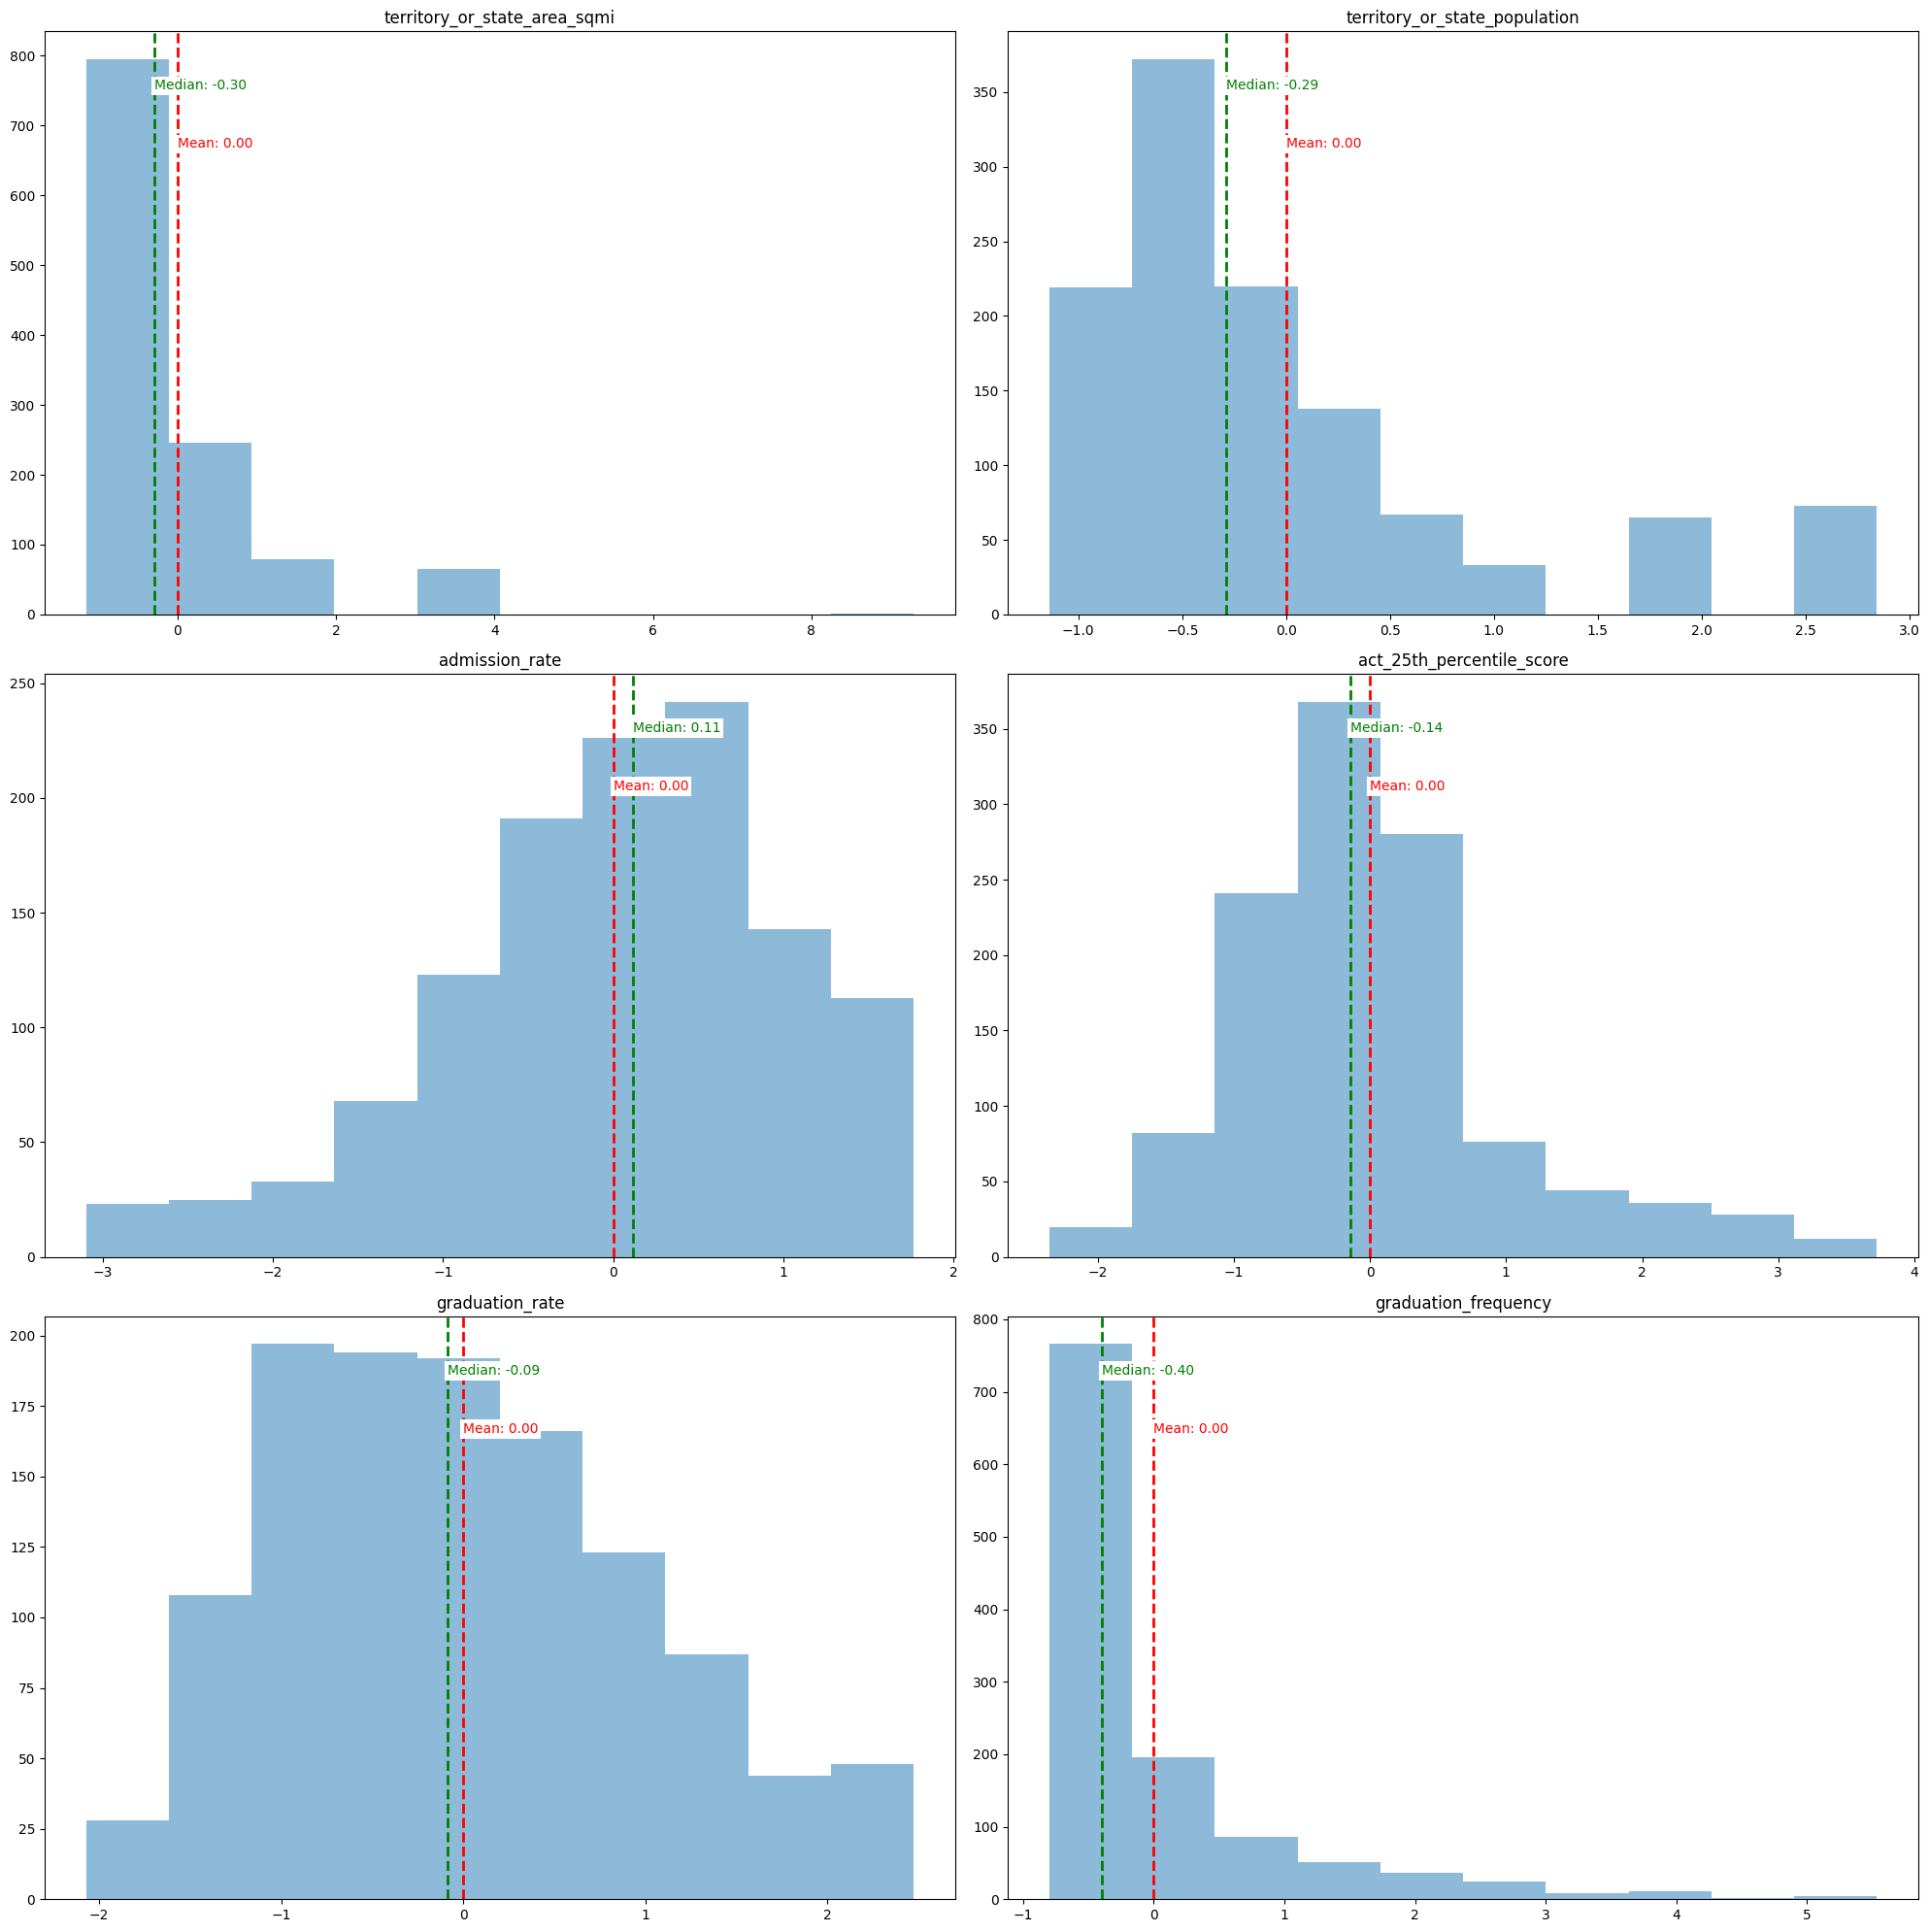

In [28]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

columns = ['territory_or_state_area_sqmi', 'territory_or_state_population', 'admission_rate', 'act_25th_percentile_score', 'graduation_rate', 'graduation_frequency']

# flatten the axs array to access each individual axis
axs = axs.flatten()

for i, col in enumerate(columns):
    axs[i].hist(institution_data[col], alpha=0.5, bins=10)
    axs[i].axvline(institution_data[col].mean(), color='red', linestyle='dashed', linewidth=2)
    axs[i].axvline(institution_data[col].median(), color='green', linestyle='dashed', linewidth=2)
    axs[i].text(institution_data[col].mean(), axs[i].get_ylim()[1]*0.8, f"Mean: {institution_data[col].mean():.2f}", color='red', bbox=dict(facecolor='white', edgecolor='none', pad=2))
    axs[i].text(institution_data[col].median(), axs[i].get_ylim()[1]*0.9, f"Median: {institution_data[col].median():.2f}", color='green', bbox=dict(facecolor='white', edgecolor='none', pad=2))
    axs[i].set_title(col)

plt.tight_layout()

plt.savefig("distributions.png")
plt.show()

### I will use a correlation heatmap to investigate possible correlations among all variables.  First I need to make a dataframe with only my features that have been normalized.

In [29]:
norm_data = institution_data[['territory_or_state_area_sqmi', 'territory_or_state_population', 'admission_rate', 'act_25th_percentile_score', 'graduation_rate', 'graduation_frequency']]

In [30]:
norm_data.head()

,territory_or_state_area_sqmi,territory_or_state_population,admission_rate,act_25th_percentile_score,graduation_rate,graduation_frequency
0,-0.329042,-0.654946,-0.007511,-1.249341,-1.796206,-0.207178
1,-0.329042,-0.654946,-0.260956,0.408841,-0.354295,0.494820
2,-0.329042,-0.654946,0.802489,0.961569,-0.984914,-0.317649
3,-0.329042,-0.654946,-0.979817,-1.249341,-1.588804,0.325588
4,-0.329042,-0.654946,-0.611170,0.408841,0.427793,4.138001


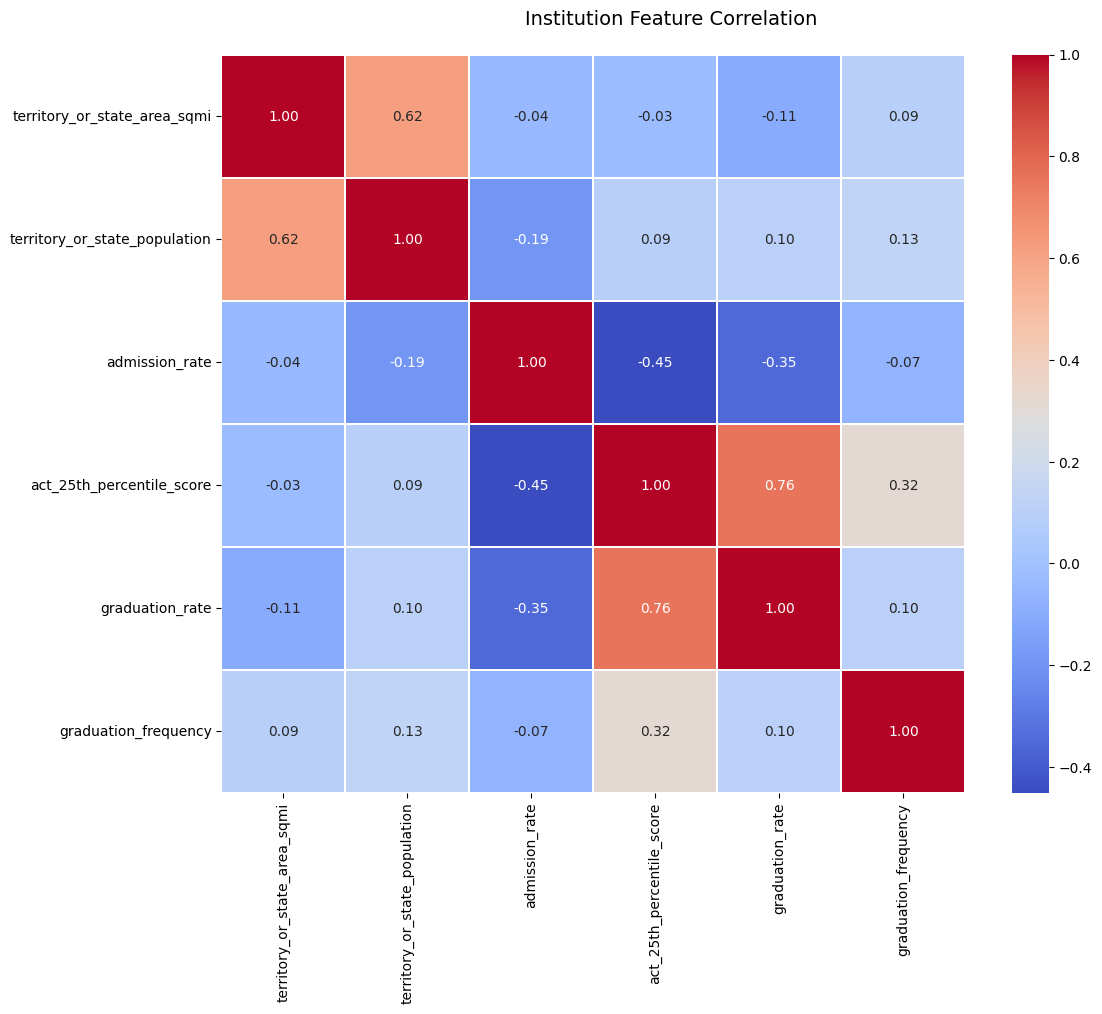

In [31]:
corrmat = norm_data.corr()
fig, ax = plt.subplots(figsize=(12, 9))
heat_map = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
title= fig.suptitle('Institution Feature Correlation', fontsize=14)
plt.savefig("heatmap.png")

## Notable positive strong and medium/strong correlations include:

#### act_25th_percentile_score : graduation_rate (0.76)
#### territory_or_state_area_sqmi : territory_or_state_population (0.62)

## Notable negative medium/strong correlations include:

#### admission_rate : act_25th_percentile_score (-0.45)
#### admission_rate : graduation_rate (-0.35)

### I want to see the pairplot visualization with a hue focus on act_25th_percentile_score:

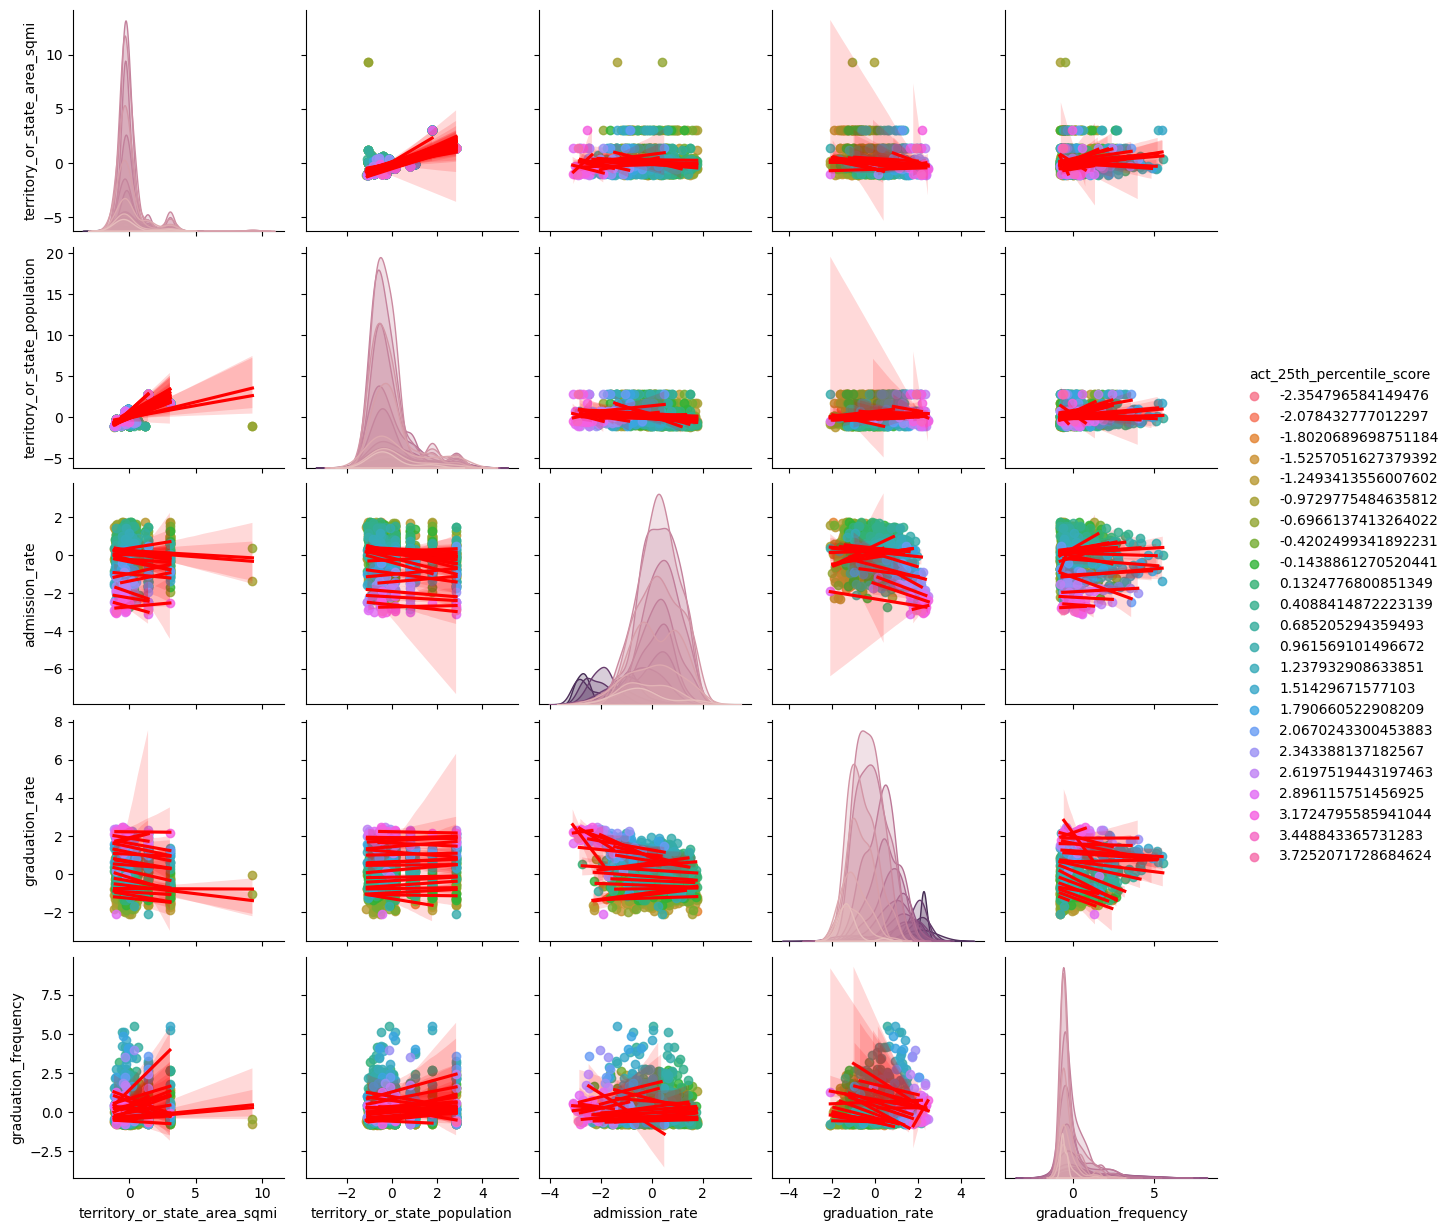

In [46]:
sns.pairplot(norm_data, hue = 'act_25th_percentile_score', kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

plt.savefig("pairplotvis_act_25th_score.png")
plt.show()


### Now I want to visualize the notable correlations mentioned earlier.

#### act_25th_percentile_score : graduation_rate (0.76)

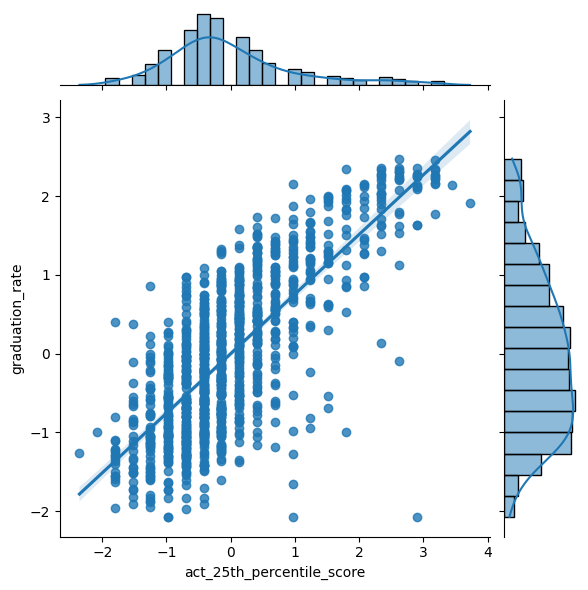

In [33]:
sns.jointplot(x='act_25th_percentile_score', y='graduation_rate', data=norm_data, kind="reg");
plt.savefig("corr_act_grad.png")

#### territory_or_state_area_sqmi : territory_or_state_population (0.62)

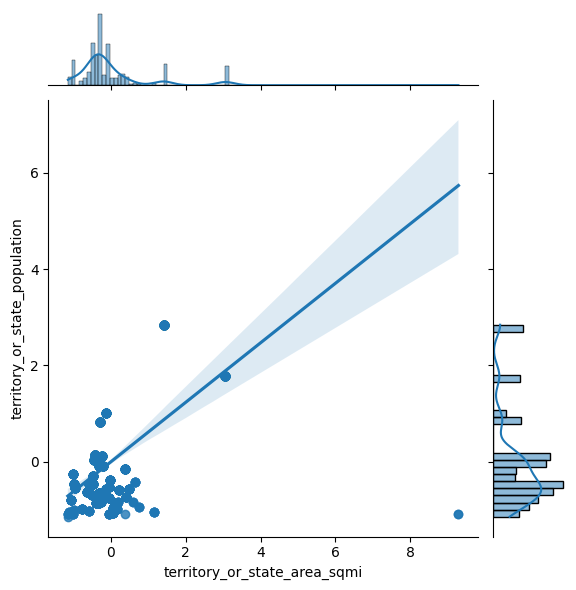

In [47]:
sns.jointplot(x='territory_or_state_area_sqmi', y='territory_or_state_population', data=norm_data, kind="reg");
plt.savefig("corr_sqmi_pop.png")

### admission_rate : act_25th_percentile_score (-0.45)

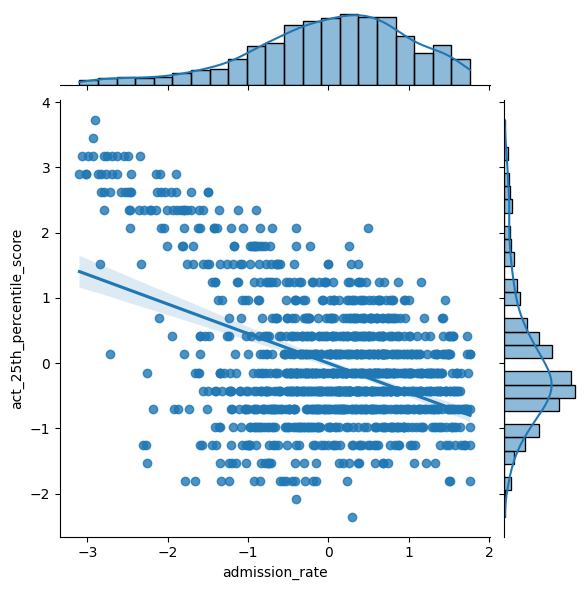

In [48]:
sns.jointplot(x='admission_rate', y='act_25th_percentile_score', data=norm_data, kind="reg");
plt.savefig("corr_adm_act.png")

#### admission_rate : graduation_rate (-0.35)

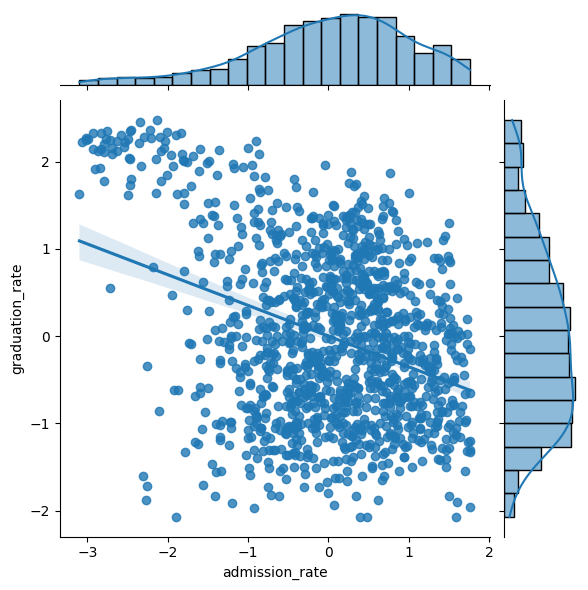

In [49]:
sns.jointplot(x='admission_rate', y='graduation_rate', data=norm_data, kind="reg");
plt.savefig("corr_adm_grad.png")

##### The strongest correlation I found act_25th_percentile_score : graduation_rate (0.76) seems intuitive to me, but I wonder if it's a result from bias during the wrangling process by only including institutions that are predominately bachelor's and graduate degree granting.

##### The second strongest correlation territory_or_state_area_sqmi : territory_or_state_population (0.62) is quite unrelated to the problem statement and I don't think it holds any value.

##### The first negative correlation admission_rate : act_25th_percentile_score (-0.45) seems reasonable given that ACT scores aren't the sole determining factor of a student's admission to an institution.  In recent years, less weight has been put on high-stakes testing for applying students and some institutions are considering or have already dropped the requirement all together.

##### I thought there would be a stronger negative correlation admission_rate : graduation_rate (-0.35), but now I can understand that the struggles students encounter during their 4 years at an instution non necessarily related to finishing curriculum (physical / emotional health, monetary issues, family-related challenges) may impact graduation a lot more than the institution's initial selectivity.

In [37]:
institution_data['predominant_degree_awarded'].unique()

array(["Bachelor's Degree"], dtype=object)

#### The categorical series predominant_degree_awarded only contains one type of value.  No institutions are entirely graduate degree granting. It's unnecessary to dummy encode this feature.

In [38]:
#institution_data.to_csv('institution_data.csv')